# Weekly Case Trend - DMV

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with artical at:

https://www.nytimes.com/article/coronavirus-county-data-us.html


In [2]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

### Add line to bottom of this section for new data
path_covid_data_us_counties_1 = datapath / 'covid-19-data-20200706' / 'us-counties.csv'
path_covid_data_us_counties_2 = datapath / 'covid-19-data-20200720' / 'us-counties.csv'
path_covid_data_us_counties_3 = datapath / 'covid-19-data-20200813' / 'us-counties.csv'
path_covid_data_us_counties_4 = datapath / 'covid-19-data-20200820' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties_4

df_covid_data_us_counties = pd.read_csv(county_data_path)

### Virginia Counties:

- Culpeper county, va (51047)
- Fauquier county, va (51061) 
- Spotsylvania county, va(51177) 
- Stafford county, va (51179)
- Prince William county, va (51153) 
- Fairfax county, va (51059)
- Loudoun county, va (51107)
- Arlington county, va (51013) 

### Independent Virginia Cities:

- City of Fredericksburg, VA (51630) 
- City of Manassas, VA (51683) 
- City of Fairfax, VA (51600)
- City of Falls Church, VA (51610)
- City of Alexandria, VA (51510)

### Federal District:

- District of Columbia, DC (11000, 11001, 11000)

### Maryland Counties:

- Charles county, md (24017)
- Prince Georges county, md (24033)
- Montgomery county, md (24031)
- Howard county, md (24027)
- Anne Arundel county, md (fips 24003)
- Frederick county, md (24021)

In [4]:
# make a list of all the counties i'm interested in

list_fips_va_counties = [51047, 51061, 51177, 51179, 51153, 51059, 51107,51013]
list_fips_va_cities = [51630, 51683, 51600, 51610, 51510]
list_fips_dc = [11000, 11001]
list_fips_md = [24017, 24033, 24031, 24027, 24003, 24021]

list_fips_va = list_fips_va_counties + list_fips_va_cities

list_fips_metrodc = list_fips_va + list_fips_dc + list_fips_md 

In [8]:
df_covid_data_metrodc = df_covid_data_us_counties[df_covid_data_us_counties.fips.isin(list_fips_metrodc)]

df_covid_data_metrodc_bydate_diff = df_covid_data_metrodc.groupby(['date'])['cases', 'deaths'].agg('sum').diff().reset_index()

df_covid_data_metrodc_bydate_diff['cases_7day_ave'] = df_covid_data_metrodc_bydate_diff.cases.rolling(7).mean().shift(-3)

df_covid_data_metrodc_bydate_diff.tail()

C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,cases,deaths,cases_7day_ave
163,2020-08-15,692.0,9.0,654.857143
164,2020-08-16,636.0,3.0,640.142857
165,2020-08-17,488.0,2.0,NaN
166,2020-08-18,627.0,9.0,NaN
167,2020-08-19,495.0,6.0,NaN


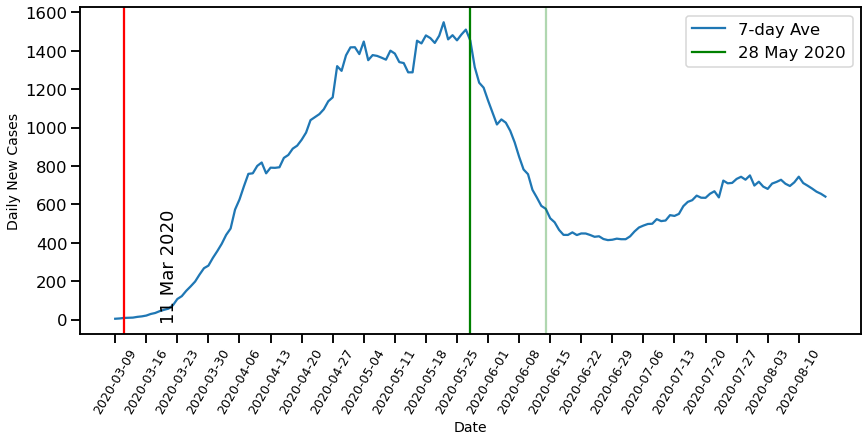

In [35]:
# bigger plot elements suitable for giving talks
#sns.set_context("talk")

# set figure size
fig = plt.figure(figsize=(14,6))

# Time series plot with Seaborn lineplot() with label
#chart = sns.lineplot(x="date",y="cases",
#             label="Daily", data=df_covid_data_metrodc_bydate_diff,
#             ci=None, alpha=.4)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
plot_ = sns.lineplot(x="date",y="cases_7day_ave",
             label="7-day Ave",
             data=df_covid_data_metrodc_bydate_diff)#,
             #ci=None)
fig.canvas.draw()

plt.axvline('2020-03-11', color='r')
plt.text(10.1,0,'11 Mar 2020',rotation=90)

plt.axvline('2020-05-28', color='green', label="28 May 2020")

plt.axvline('2020-06-14', color='green', alpha=.31)

plt.legend()

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 7), new_ticks[::7], rotation=60, fontweight='light', fontsize='x-small')

# plt.xticks(
#     rotation=90,
#     fontweight='light',
#     fontsize='x-small'
# )

# save image as PNG file
plt.savefig("Time_Series_Plot_with_7day_average_Seaborn.png",
                    format='png',
                    dpi=150)